<a href="https://colab.research.google.com/github/AnanyaRohatgi/Amazon-Fine-Food-Review/blob/main/Amazon_Fine_Food_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
pip install --upgrade nltk scikit-learn matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 19.1 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df= pd.read_csv(r'/content/Reviews.csv')

In [ ]:
df.shape

(568454, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df. describe

<bound method NDFrame.describe of             Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                          1                       1      5  1303862400   
1                          0                       0      1  1346976000   
2                          1                       1      4  1219017600   
3                          3                       3      2  1307923200   
4                          0                       0      5  1350777600   
...                      ...                     ...    ...         ...   
568449                     0                       0      5  1299628800   
568450                     0                       0      2  1331251200   
568451                     2                       2      5  1329782400   
568452                     1                       1      5  1331596800   
568453                     0                       0      5  1338422400   

                                   Summary  \
0                    Good Quality Dog Food   
1                        Not as Advertised   
2                    "Delight" says it all   
3                           Cough Medicine   
4                              Great taffy   
...                                    ...   
568449                 Will not do without   
568450                        disappointed   
568451            Perfect for our maltipoo   
568452  Favorite Training and reward treat   
568453                         Great Honey   

                                                     Text  
0       I have bought several of the Vitality canned d...  
1       Product arrived labeled as Jumbo Salted Peanut...  
2       This is a confection that has been around a fe...  
3       If you are looking for the secret ingredient i...  
4       Great taffy at a great price.  There was a wid...  
...                                                   ...  
568449  Great for sesame chicken..this is a good if no...  
568450  I'm disappointed with the flavor. The chocolat...  
568451  These stars are small, so you can give 10-15 o...  
568452  These are the BEST treats for training and rew...  
568453  I am very satisfied ,product is as advertised,...  

[568454 rows x 10 columns]>

In [ ]:
print(df.isnull().any().any())

True


In [ ]:
df.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


In [ ]:
df.dropna(subset=['Text'], inplace=True)
df['Summary'] = df['Summary'].fillna("")

In [ ]:
df.drop_duplicates()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [ ]:
df.drop_duplicates(subset=['UserId', 'ProductId', 'Text'], inplace=True)

In [ ]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Clean the 'Text' column
df['CleanedText'] = df['Text'].apply(clean_text)

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize the cleaned text
df['LemmatizedText'] = df['CleanedText'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))

In [ ]:
import numpy as np
from collections import Counter

# Tokenize the text (split into words)
df['Tokens'] = df['LemmatizedText'].apply(lambda x: x.split())

# Calculate Vocabulary Size
all_words = [word for tokens in df['Tokens'] for word in tokens]
vocab_size = len(set(all_words))  # Number of unique words
print(f"Vocabulary Size: {vocab_size}")

# Calculate Maximum Sequence Length
sequence_lengths = df['Tokens'].apply(len)
max_length = sequence_lengths.max()  # Longest review
print(f"Maximum Sequence Length: {max_length}")

# Optionally calculate the 95th percentile sequence length
max_length_95th = int(np.percentile(sequence_lengths, 95))
print(f"95th Percentile Sequence Length: {max_length_95th}")


Vocabulary Size: 215267
Maximum Sequence Length: 1953
95th Percentile Sequence Length: 112


In [ ]:
df.to_csv('Cleaned_Reviews.csv', index=False)
print("Dataset cleaning complete. Cleaned data saved as 'Cleaned_Reviews.csv'.")

Dataset cleaning complete. Cleaned data saved as 'Cleaned_Reviews.csv'.


In [ ]:
df['Sentiment']= df['Score'].apply(lambda x:0 if x<=2 else (1 if x==3 else 2))

In [ ]:
print("Data after cleaning")
print(df[['Text', 'Sentiment']].head())

Data after cleaning
                                                Text  Sentiment
0  I have bought several of the Vitality canned d...          2
1  Product arrived labeled as Jumbo Salted Peanut...          0
2  This is a confection that has been around a fe...          2
3  If you are looking for the secret ingredient i...          0
4  Great taffy at a great price.  There was a wid...          2


Sentiment
2    442869
0     81718
1     42558
Name: count, dtype: int64
Sentiment
2    78.087438
0    14.408661
1     7.503901
Name: proportion, dtype: float64


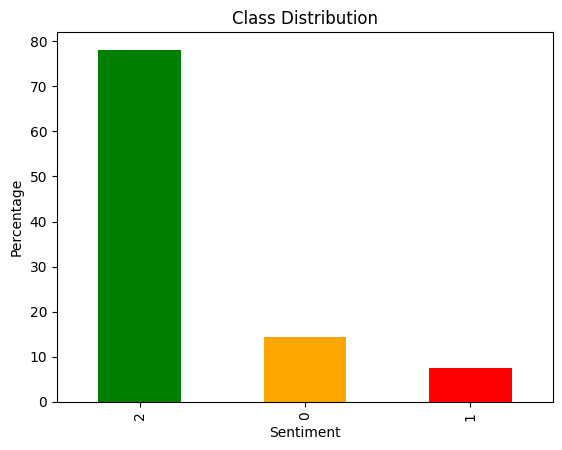

In [ ]:
print(df['Sentiment'].value_counts())
class_distribution = df['Sentiment'].value_counts(normalize=True) * 100
print(class_distribution)

# Plot the class distribution
class_distribution.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.show()

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE


# Ensure the text column contains only strings
df['Text'] = df['Text'].astype(str)

# Apply TF-IDF transformation
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df['Text'])  # Ensure 'text' is your column name

# Apply SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_tfidf, df['Sentiment'])


Class distribution after SMOTE: Counter({2: 442869, 0: 442869, 1: 442869})
Class percentages after SMOTE: {2: 33.33333333333333, 0: 33.33333333333333, 1: 33.33333333333333}


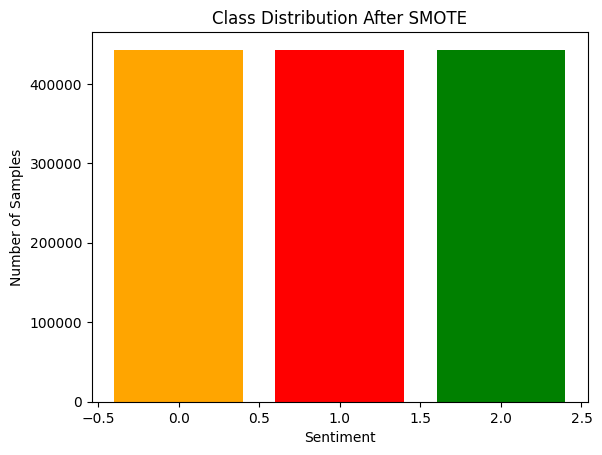

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Check the distribution of the balanced labels
class_counts = Counter(y_balanced)
print("Class distribution after SMOTE:", class_counts)

# Convert to percentages for a clearer view
total_samples = sum(class_counts.values())
class_percentages = {label: (count / total_samples) * 100 for label, count in class_counts.items()}
print("Class percentages after SMOTE:", class_percentages)

# Visualize the class distribution
plt.bar(class_counts.keys(), class_counts.values(), color=['green', 'orange', 'red'])
plt.title('Class Distribution After SMOTE')
plt.xlabel('Sentiment')
plt.ylabel('Number of Samples')
plt.show()


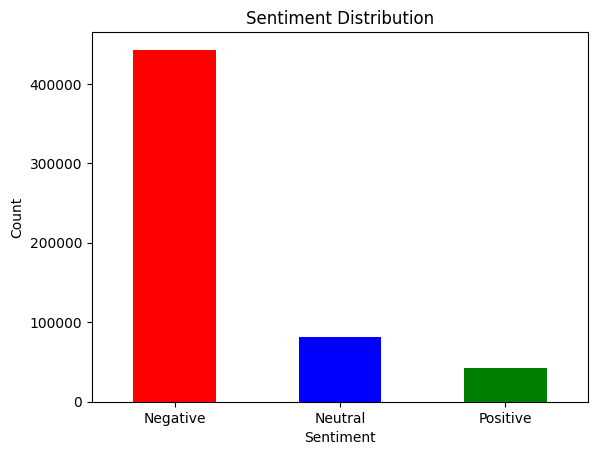

In [ ]:
%matplotlib inline
df['Sentiment'].value_counts().plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive'], rotation=0)
plt.show()

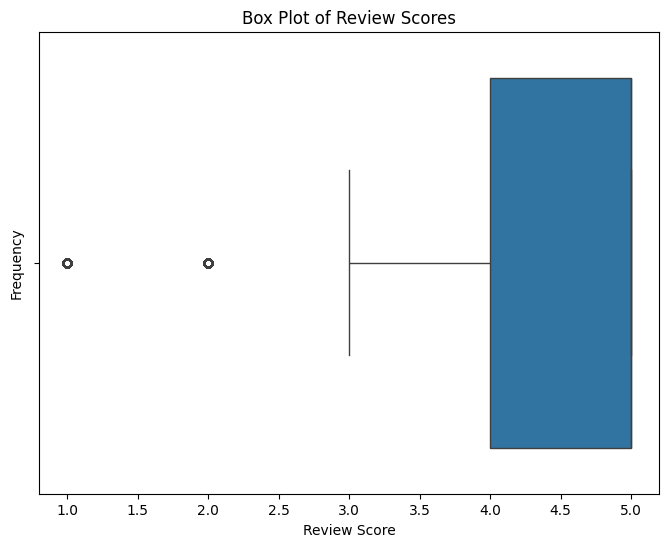

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Score', data=df)
plt.title('Box Plot of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()

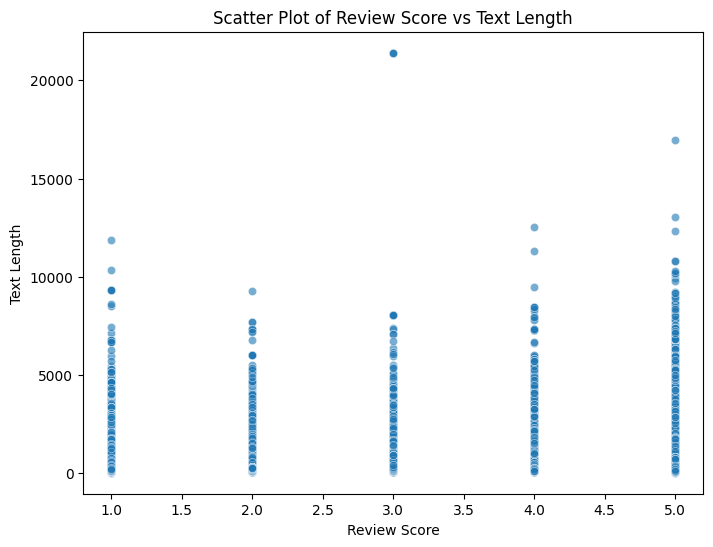

In [ ]:
df['Text length'] = df['Text'].apply(lambda x: len(str(x)))

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Score', y='Text length', data=df, alpha=0.6)
plt.title('Scatter Plot of Review Score vs Text Length')
plt.xlabel('Review Score')
plt.ylabel('Text Length')
plt.show()

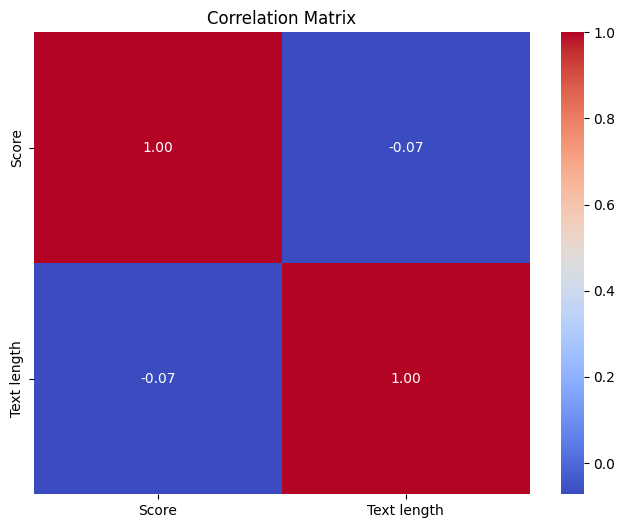

In [ ]:
df['Text length'] = df['Text'].apply(lambda x: len(str(x)))
numerical_features = ['Score', 'Text length']
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
for col in non_numeric_columns:
    df[col] = df[col].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)



NameError: name 'non_numeric_columns' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Assume 'df' is your DataFrame
# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns

# Apply Label Encoding or One-Hot Encoding based on column nature
label_encoders = {}
for col in non_numeric_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Label Encoding for simplicity
    label_encoders[col] = le  # Save encoders if you need to reverse-transform

# Split the data
X = df.drop('Score', axis=1)
y = df['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and plot confusion matrix
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
labels = sorted(set(y_test) | set(y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print("Length of X_train:", len(X_train))
print("Length of y_train:", len(y_train))


In [ ]:
print("X_train_tfidf shape:", X_train_tfidf.shape)
print("y_train length:", len(y_train))
print(y_train.value_counts())
print("Any missing values in y_train:", y_train.isnull().sum())
print("Type of X_train_tfidf:", type(X_train_tfidf))
print("Type of y_train:", type(y_train))
print("Shape of X_train_tfidf:", X_train_tfidf.shape)  # Rows should match y_train length
print("Length of y_train:", len(y_train))




In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.3, random_state=42, stratify=df['Sentiment'])

# Vectorize the training data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_tfidf, y_train = smote.fit_resample(X_train_tfidf, y_train)


In [ ]:
print("X_train_tfidf shape after SMOTE:", X_train_tfidf.shape)
print("y_train length after SMOTE:", len(y_train))
print("Class distribution after SMOTE:", y_train.value_counts())


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



# Ensure 'Text' column contains only strings and 'Sentiment' is the label
df['Text'] = df['Text'].astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.3, random_state=42, stratify=df['Sentiment'])

# Apply TF-IDF transformation to convert text data into numerical vectors
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = nb_model.predict(X_test_tfidf)

# Print the classification report
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred))

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
disp.plot(cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = nb_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Model Accuracy: {accuracy * 100:.2f}%")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test_tfidf)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Model Accuracy: {accuracy_knn * 100:.2f}%")

# Print the classification report
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Generate and display the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=knn.classes_)
disp_knn.plot(cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.show()


In [ ]:
pip install --upgrade numpy h5py


In [ ]:
pip install --upgrade tensorflow


In [ ]:
! pip install numpy<2
import numpy as np
print(np.__version__)



In [ ]:
import tensorflow as tf
import numpy as np
import h5py

print(f"TensorFlow Version: {tf.__version__}")
print(f"NumPy Version: {np.__version__}")
print(f"h5py Version: {h5py.__version__}")


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Dense, Flatten

In [ ]:

cnn_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    Conv1D(128, 5, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # Change: 3 units for 3 classes, softmax activation
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',  # Change: categorical crossentropy for multi-class
                  metrics=['accuracy'])

